In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gisaug.augmentations import DropRandomPoints, Stretch, DropRandomRegions, ChangeAmplitude, Pipeline

np.random.seed(73)

In [2]:
surface = np.sin(np.linspace(0, 10, 1000) / .75) / np.linspace(.3, 7, 1000)
surface *= 100
surface += abs(np.min(surface))

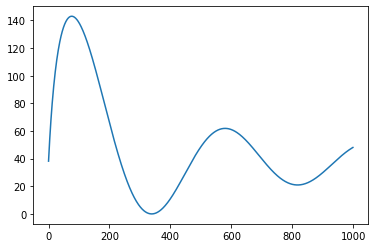

In [3]:
plt.plot(surface)

In [4]:
def batman(x):
    """Curve with a form of Batman's head. Works for `x` from -25 to 25"""
    
    from scipy import stats
    
    if abs(x) >= 25:
        return 0
    
    if x > 0:
        return batman(-x)
    
    if x <= -20:
        return np.exp(x + 20) - 0.007
    
    elif -20 < x <= -14:
        return -x / 6 - 14 / 6
    
    elif -14 < x <= 14:
        return stats.norm(0, 10).pdf(x) * 5 - 0.07
    
    else:
        return np.exp(-x - 20)

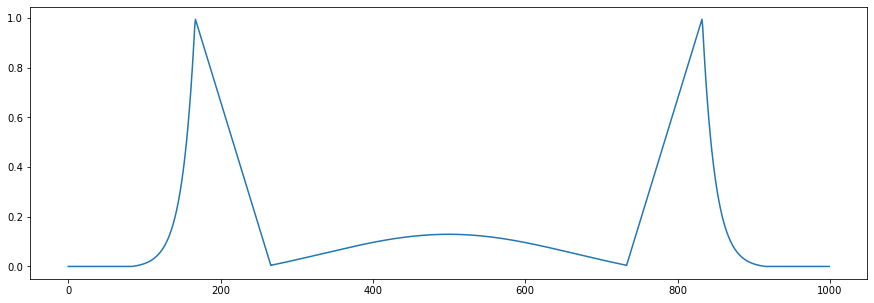

In [5]:
curve = np.array([batman(x_i) for x_i in np.linspace(-30, 30, 1000)])

plt.figure(figsize=(15, 5))
plt.plot(curve);

In [6]:
augmentations = [
    ChangeAmplitude(
        c=(0.3, 2), k=5, region_start_fraction=(0.1, 0.5),
        region_end_fraction=(0.6, 0.8), clip=(0, 1), smooth=True
    ),
    Stretch(c=(1.05, 1.1)),
    DropRandomRegions(p=(0.03, 0.07), k=2),
]

pipeline = Pipeline(augmentations, k=2)

In [7]:
def augmentate_curve_on_surface(curve, surface):
    pass

In [8]:
points = [100, 300, 500, 800, 950]

starting_point = 0

start = surface[starting_point]

augmented_curves = []

for point in points:
    height = start - surface[point]
    length_change = (len(curve) + height) / len(curve)
    
    if height < 0:  # Surface is at the lower level, so need to shorten the curve
        length_augmentation = DropRandomPoints(p=length_change)
        
    else:  # Surface is at the higher level, so need to streth the curve
        length_augmentation = Stretch(c=length_change)
        
    augmented_curve = length_augmentation(curve.copy())
    augmented_curve = pipeline(augmented_curve)
        
    augmented_curves.append(augmented_curve)

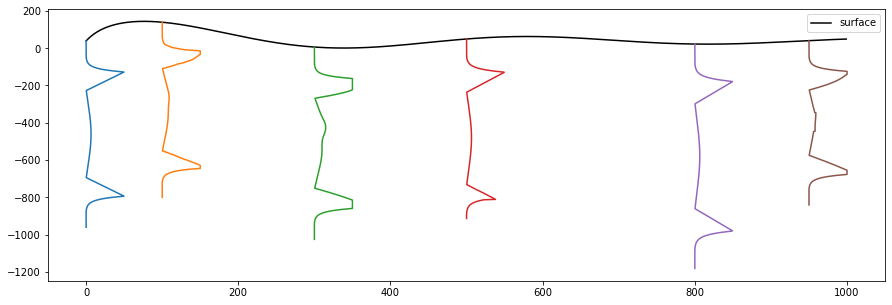

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(surface, color="black", label="surface")

depth = np.arange(surface[0], surface[0] - len(curve), -1)
plt.plot(50 * curve, depth)

for i, point in enumerate(points):
    depth = np.arange(surface[point], surface[point] - len(augmented_curves[i]), -1)
    plt.plot(50 * augmented_curves[i] + point, depth)

plt.legend()